In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
np.random.seed(42)
X = np.random.randn(100, 5)
true_coefficients = np.array([2, -1.5, 0.7, 3.2, -0.9])
y = np.dot(X, true_coefficients) + np.random.randn(100) * 2

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
class RidgeRegressionGD:
    def __init__(self, alpha=1.0, learning_rate=0.01, n_iterations=1000):
        """
        Ridge Regression using Gradient Descent.
        Arguments:
        - alpha: Regularization strength (default=1.0).
        - learning_rate: Step size for gradient descent (default=0.01).
        - n_iterations: Number of iterations for gradient descent (default=1000).
        """
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fit the model using the training data.
        Arguments:
        - X: Independent variables (features), expects a 2D array.
        - y: Dependent variable (target), expects a 1D array.
        """
        # Number of samples and features
        m, n = X.shape

        # Initialize weights and intercept
        self.coef_ = np.zeros(n)
        self.intercept_ = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Calculate predictions
            y_pred = np.dot(X, self.coef_) + self.intercept_

            # Compute gradients
            error = y_pred - y
            coef_gradient = (1 / m) * (np.dot(X.T, error) + self.alpha * self.coef_)
            intercept_gradient = (1 / m) * np.sum(error)

            # Update weights and intercept
            self.coef_ -= self.learning_rate * coef_gradient
            self.intercept_ -= self.learning_rate * intercept_gradient

    def predict(self, X):
        """
        Predict the target values for the given data.
        Arguments:
        - X: Independent variables (features), expects a 2D array.
        """
        return np.dot(X, self.coef_) + self.intercept_

In [5]:
# Train Scikit-learn Linear Regression (OLS)
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
ols_train_pred = ols_model.predict(X_train)
ols_test_pred = ols_model.predict(X_test)

# Train Scikit-learn Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

# Train Custom Ridge Regression
ridge_gd = RidgeRegressionGD(alpha=1.0, learning_rate=0.01, n_iterations=1000)
ridge_gd.fit(X_train, y_train)
custom_ridge_train_pred = ridge_gd.predict(X_train)
custom_ridge_test_pred = ridge_gd.predict(X_test)

In [6]:
# Calculate Mean Squared Errors
ols_train_error = mean_squared_error(y_train, ols_train_pred)
ols_test_error = mean_squared_error(y_test, ols_test_pred)

ridge_train_error = mean_squared_error(y_train, ridge_train_pred)
ridge_test_error = mean_squared_error(y_test, ridge_test_pred)

custom_ridge_train_error = mean_squared_error(y_train, custom_ridge_train_pred)
custom_ridge_test_error = mean_squared_error(y_test, custom_ridge_test_pred)

# Display errors
print("Error Comparison:")
print(f"OLS (Train): {ols_train_error:.2f}, OLS (Test): {ols_test_error:.2f}")
print(f"Ridge (Sklearn) (Train): {ridge_train_error:.2f}, Ridge (Sklearn) (Test): {ridge_test_error:.2f}")
print(f"Ridge (Custom) (Train): {custom_ridge_train_error:.2f}, Ridge (Custom) (Test): {custom_ridge_test_error:.2f}")

Error Comparison:
OLS (Train): 3.33, OLS (Test): 3.24
Ridge (Sklearn) (Train): 3.33, Ridge (Sklearn) (Test): 3.27
Ridge (Custom) (Train): 3.33, Ridge (Custom) (Test): 3.27


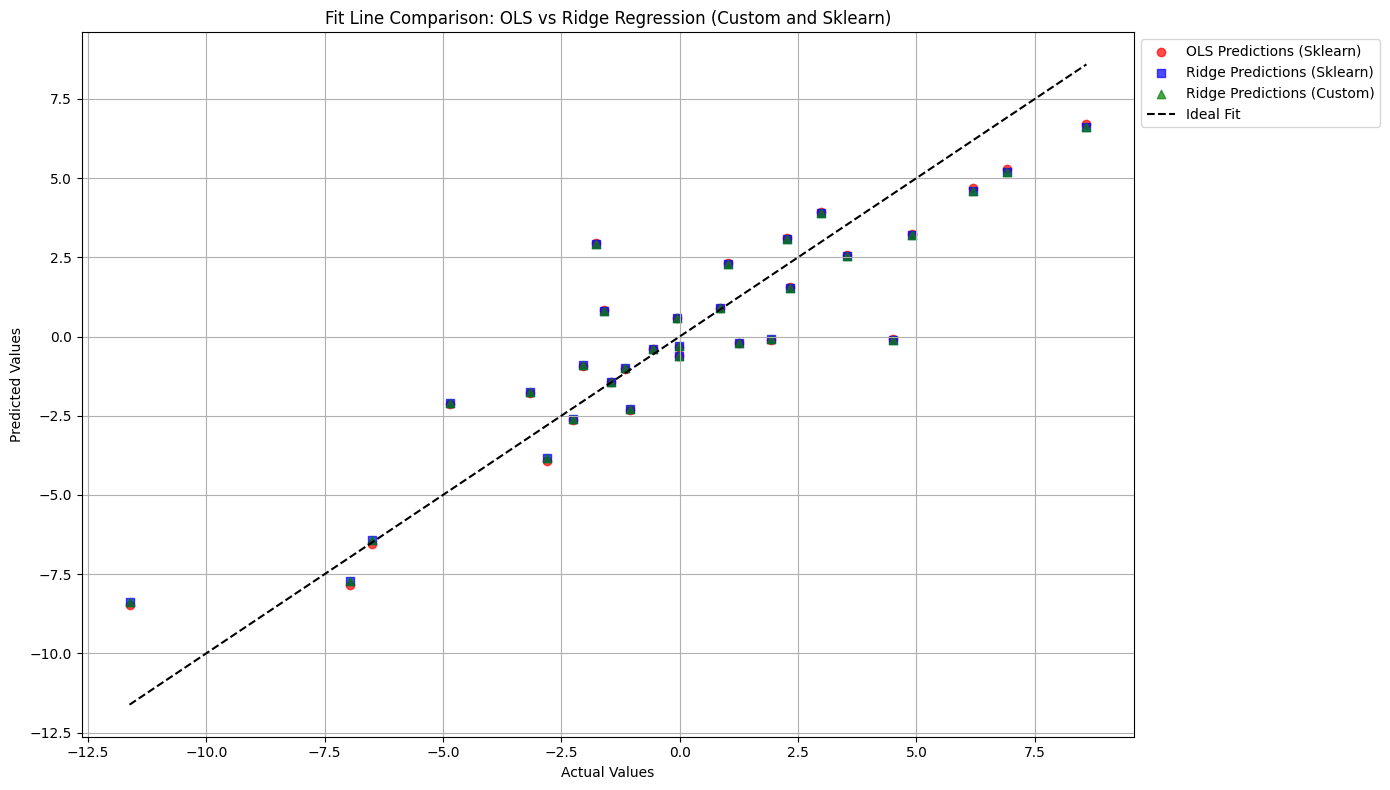

In [7]:
plt.figure(figsize=(14, 8))

# Scatter actual vs predicted for each model with different markers
plt.scatter(y_test, ols_test_pred, label="OLS Predictions (Sklearn)", alpha=0.7, color="red", marker='o')
plt.scatter(y_test, ridge_test_pred, label="Ridge Predictions (Sklearn)", alpha=0.7, color="blue", marker='s')
plt.scatter(y_test, custom_ridge_test_pred, label="Ridge Predictions (Custom)", alpha=0.7, color="green", marker='^')

# Plot diagonal line (ideal fit)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", linestyle="--", label="Ideal Fit")

# Chart settings
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Fit Line Comparison: OLS vs Ridge Regression (Custom and Sklearn)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()